**About Company**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market

**Problem Statement**

The company wants to know:

Which **variables** are significant in predicting the **demand for shared electric cycles** in the Indian market?
How well those variables describe the electric cycle demands


**Column Profiling**

• datetime: datetime

• season: season (1: spring, 2: summer, 3: fall, 4: winter)

• holiday: whether day is a holiday or not

• workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

• weather: 1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered
clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist,
Snow + Fog

• temp: temperature in Celsius

• atemp: feeling temperature in Celsius

• humidity: humidity

• windspeed: wind speed

• casual: count of casual users

• registered: count of registered users

• count: count of total rental bikes including both casual and registered


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats, norm

In [3]:
yulu = pd.read_csv("/content/bike_sharing.csv")
yulu

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

**Exploratory Data Analysis (EDA):**

Conducting EDA to understand the structure, characteristics, and distributions of the dataset.
This include

• Shape of the data, info

• checking data types

• converting categorical attributes to category if required

• handling missing values

• converting categorical attributes

• analyzing numerical and categorical variables
distributions.

In [ ]:
yulu.shape

(10886, 12)

In [ ]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
yulu.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [ ]:
yulu.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Finding numerical and categorical data

In [ ]:
yulu.describe(include = object).T

count unique                  top freq
datetime  10886  10886  2011-01-01 00:00:00    1

Converting season, holiday, workingday, weather to categorical columns

Converting datetime column to datetime datetime datatype


In [4]:
columns = list(yulu.columns)
columns
# for i in columns:
#   print(yulu[i].describe())

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

In [5]:
yulu['season'] = yulu['season'].replace({1:"spring", 2: "summer", 3: "fall", 4: "winter"})
yulu['holiday'] = yulu['holiday'].replace({1: "holiday", 0: "not_holiday"})
yulu['workingday'] = yulu['workingday'].replace({1: "workingday", 0: "not_workingday"})
yulu['weather'] = yulu['weather'].replace({1: "clear", 2: "cloudy", 3: "light_snow", 4: "heavy_rain"})
yulu['datetime'] = pd.to_datetime(yulu['datetime'])

In [6]:
# store numerical and categorical column in two different variables. It comes handy during visualizaion.
num_col = yulu._get_numeric_data().columns
cat_col = list(set(columns)-set(num_col))
print(f"num_col : {num_col}")
print(f"cat_col : {cat_col}")

num_col : Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')
cat_col : ['season', 'holiday', 'datetime', 'workingday', 'weather']


In [ ]:
describe_cat_df = yulu.describe(include=object)
describe_cat_df

season      holiday  workingday weather
count    10886        10886       10886   10886
unique       4            2           2       4
top     winter  not holiday  workingday   clear
freq      2734        10575        7412    7192

**Plotting Null values in a Dataset**

In [ ]:
null_df = yulu.apply(lambda x: sum(x.isnull())).to_frame(name="count")
print(null_df)

            count
datetime        0
season          0
holiday         0
workingday      0
weather         0
temp            0
atemp           0
humidity        0
windspeed       0
casual          0
registered      0
count           0


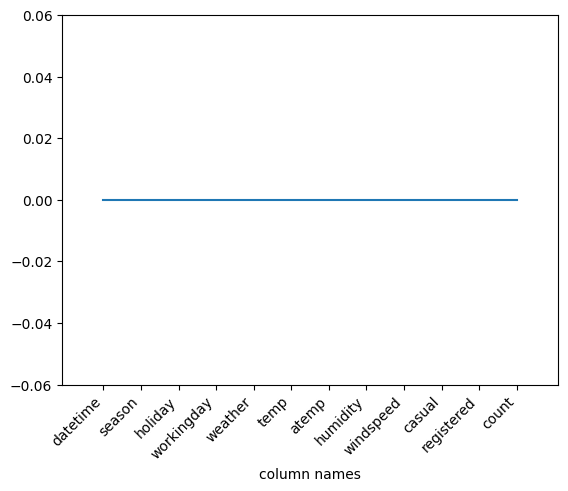

In [ ]:
plt.plot(null_df.index, null_df['count'])
plt.xticks(null_df.index, null_df.index, rotation=45,
horizontalalignment='right')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

No null values in the dataset

**Checking for duplicate values**

In [ ]:
np.any(yulu.duplicated())

False

**Checking the time period of data in the dataset**

In [7]:
yulu['datetime'].min()

Timestamp('2011-01-01 00:00:00')

In [8]:
yulu['datetime'].max()

Timestamp('2012-12-19 23:00:00')

In [9]:
yulu['datetime'].max() - yulu['datetime'].min()

Timedelta('718 days 23:00:00')

In [37]:
yulu['year'] = yulu['datetime'].dt.year

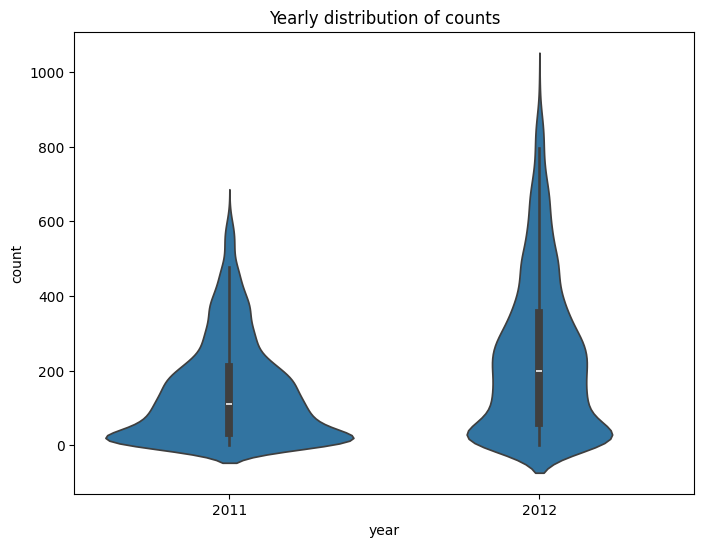

In [40]:
fig,ax=plt.subplots(figsize=(8,6))
#Violin plot for yearly distribution of counts
sns.violinplot(x='year',y='count',data=yulu[['year','count']])
ax.set_title('Yearly distribution of counts')
plt.show()

The number of rentals increased from 2011 to 2012

In [ ]:
yulu.set_index('datetime', inplace = True)

In [ ]:
yulu.head()

season      holiday      workingday weather  temp  \
datetime                                                                 
2011-01-01 00:00:00  spring  not holiday  not workingday   clear  9.84   
2011-01-01 01:00:00  spring  not holiday  not workingday   clear  9.02   
2011-01-01 02:00:00  spring  not holiday  not workingday   clear  9.02   
2011-01-01 03:00:00  spring  not holiday  not workingday   clear  9.84   
2011-01-01 04:00:00  spring  not holiday  not workingday   clear  9.84   

                      atemp  humidity  windspeed  casual  registered  count  \
datetime                                                                      
2011-01-01 00:00:00  14.395        81        0.0       3          13     16   
2011-01-01 01:00:00  13.635        80        0.0       8          32     40   
2011-01-01 02:00:00  13.635        80        0.0       5          27     32   
2011-01-01 03:00:00  14.395        75        0.0       3          10     13   
2011-01-01 04:00:00  14.395        75        0.0       0           1      1   

                     year  
datetime                   
2011-01-01 00:00:00  2011  
2011-01-01 01:00:00  2011  
2011-01-01 02:00:00  2011  
2011-01-01 03:00:00  2011  
2011-01-01 04:00:00  2011

**Check for Outliers.**
Boxplot, Interquartile Range (IQR)

**Plotting numerical data using boxplot**

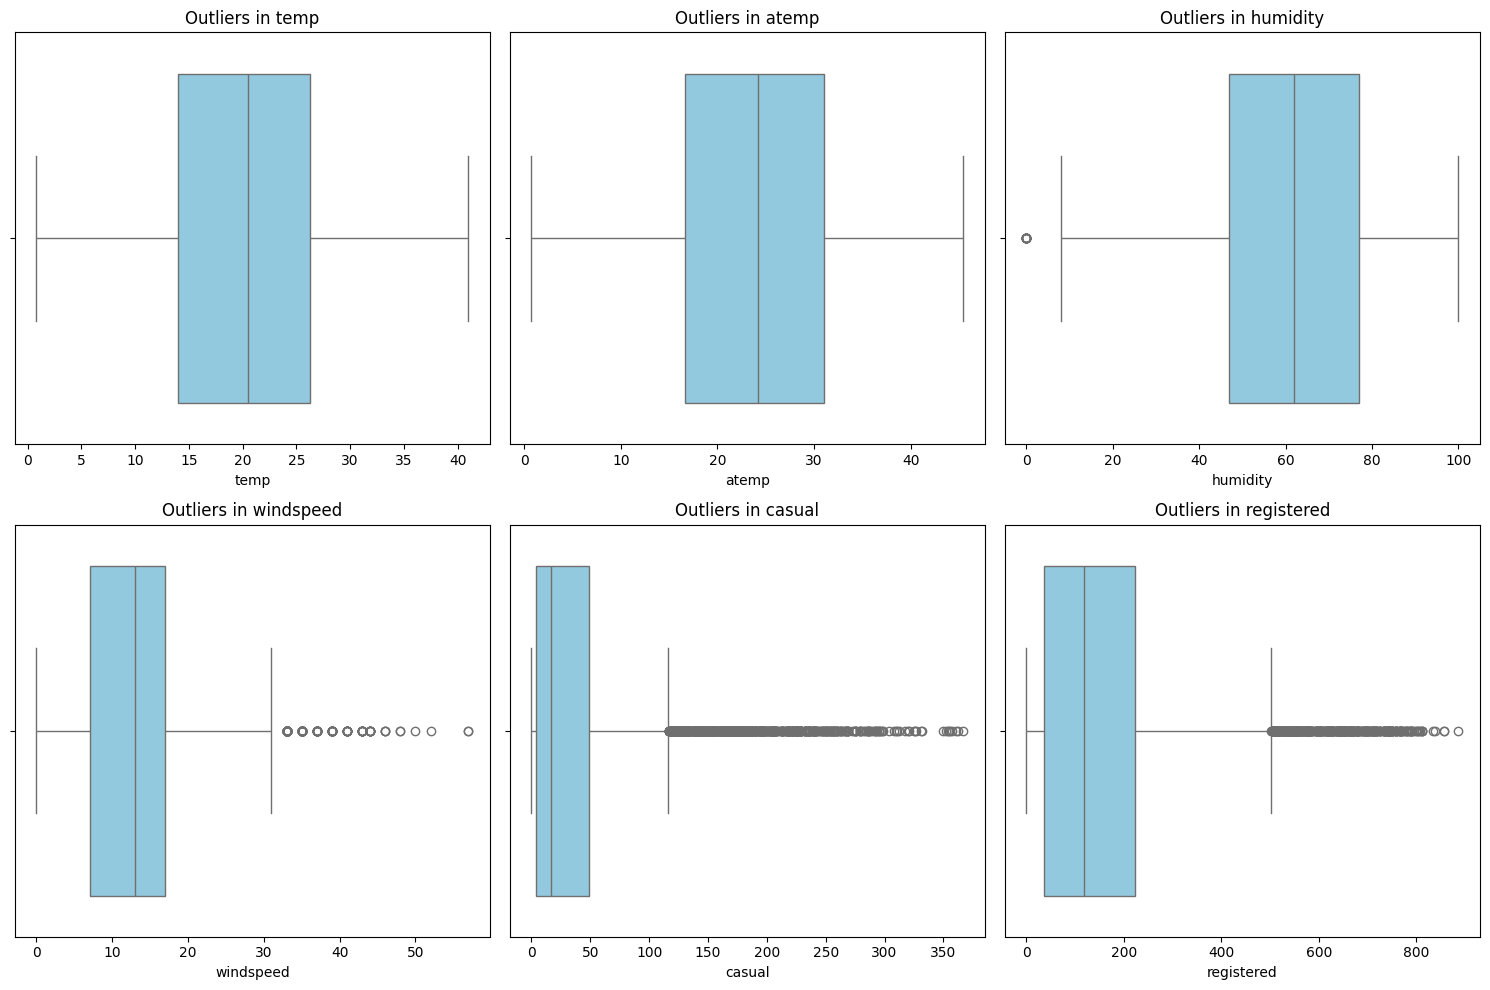

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axs.flatten()): # Use i to iterate through the subplots and num_col
  if i < len(num_col): # Check if i is within the bounds of num_col
    ax.set_title(f'Outliers in {num_col[i]}') # Changed to f-string for formatting
    sns.boxplot(x=num_col[i], data=yulu, color='skyblue', ax=ax) # Plot on the current subplot using seaborn
plt.tight_layout() # Adjust subplot spacing
plt.show()

**IQR**

Text(0.5, 1.0, 'box plot before removing outlier')

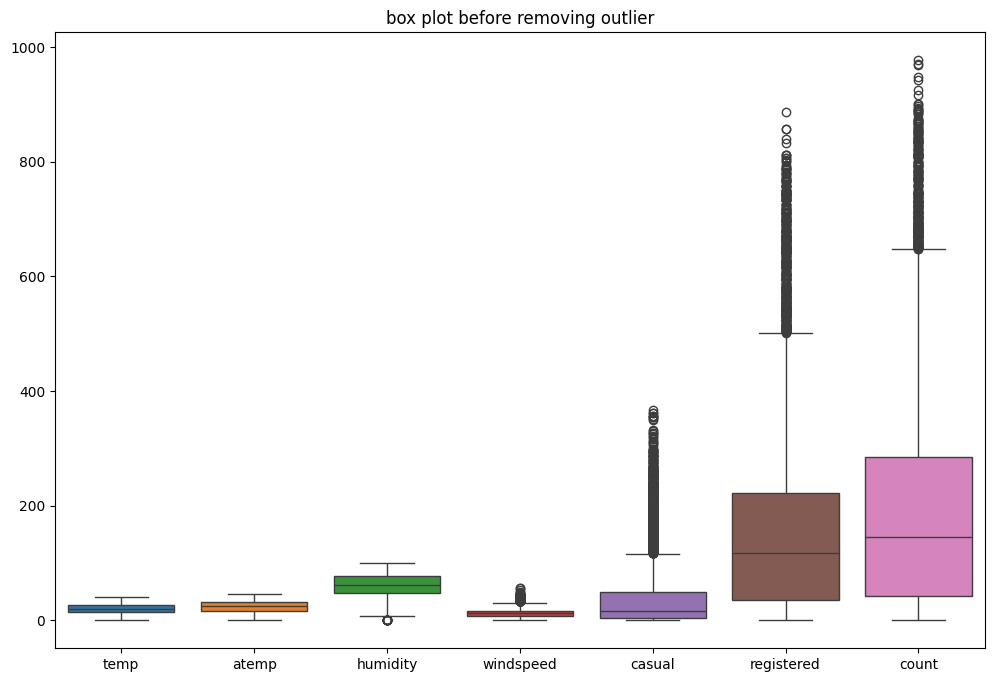

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(data = yulu)
plt.title('box plot before removing outlier')

In [13]:
for i in ['windspeed','casual','registered','count']:
  Q1= np.quantile(yulu[i],0.25)
  Q2= np.quantile(yulu[i],0.75)
  IQR = Q2-Q1
  l_bound = Q1-1.5*IQR
  u_bound = Q2+1.5*IQR
  outliers = yulu[(yulu[i]<l_bound) | (yulu[i]>u_bound)]
  print("{} includes {} outliers".format(i,len(outliers)))
  yulu[i] = np.clip(yulu[i] , l_bound , u_bound)

windspeed includes 227 outliers
casual includes 749 outliers
registered includes 423 outliers
count includes 300 outliers


Text(0.5, 1.0, 'box plot after removing outlier')

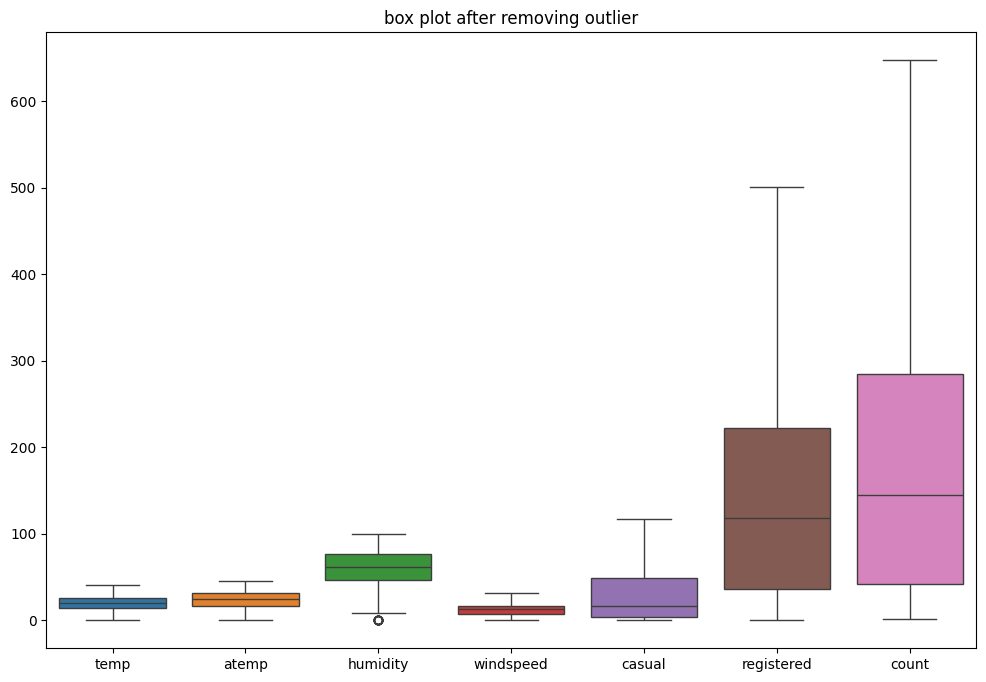

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(data = yulu)
plt.title('box plot after removing outlier')

**Median, interquartile range (IQR), and the number of outliers from boxplot—describe the central tendency, spread, and distribution characteristics of the data**

**Outliers:**

All four categories (season, holiday, working day, and weather) have significant outliers, particularly in the upper range of the count variable.
This suggests that, occasionally, very high counts occur across different conditions.

**Season:**

There seems to be a variation in count distributions across different seasons.
The count for the first season is lower on average compared to other seasons.
The interquartile range (IQR) is wider in seasons 3 and 4, meaning that counts are more dispersed.

**More number of bikes were rented in summer and fall seasons.**

**Holiday:**

The median count is higher on non-holidays (0) than on holidays (1).
The spread of values on holidays is smaller compared to non-holidays, with fewer extreme values, except for some high-count outliers.

**More numer of bikes were rented during a holiday**

**Working Day:**

The median count on working days is higher than on non-working days.
Similar to the holiday plot, non-working days have a smaller IQR and fewer extreme outliers.

**Simultaneously more number of bikes were rented during a non working day**

**Weather:**

Weather condition 3 (Light Snow, Light Rain + Thunderstorm + Scattered
clouds, Light Rain + Scattered clouds) has a **lower median count and a smaller spread**, with many outliers on the upper end, indicating some very high counts despite the typically lower numbers.
Weather conditions 1 and 2 have higher medians and larger IQRs, but they also have more outliers, particularly in condition 2.

**Less number of bikes were rented whenever there is rain, thunderstorm, snow or fog**

**General Observations:**

The data exhibits a large number of outliers across multiple categories.
The count distributions vary significantly across the categories, particularly in season and weather, indicating that these factors may strongly influence the count.
Holidays and non-working days tend to have fewer extreme values but are still susceptible to occasional high-count outliers.

In [10]:
# Convert cat_col to a proper list
cat_cols = ['weather', 'season', 'holiday', 'workingday']

# Now you should be able to access the columns correctly
cat_val_counts = yulu[cat_cols].melt().groupby(['variable','value'])['value'].count()
cat_val_counts

variable    value         
holiday     holiday             311
            not_holiday       10575
season      fall               2733
            spring             2686
            summer             2733
            winter             2734
weather     clear              7192
            cloudy             2834
            heavy_rain            1
            light_snow          859
workingday  not_workingday     3474
            workingday         7412
Name: value, dtype: int64

**Plot a Correlation Heatmap and draw insights.**

<Axes: >

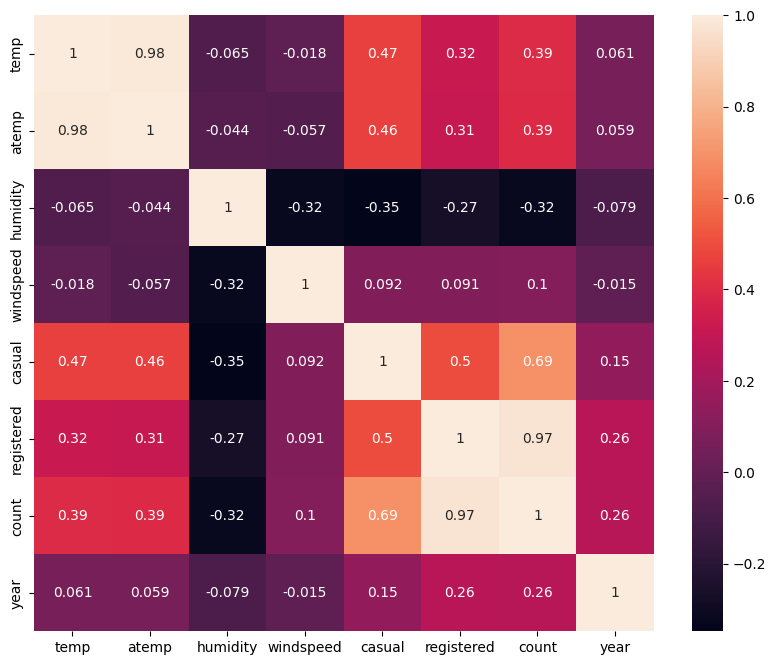

In [54]:
plt.figure(figsize = (10,8))
sns.heatmap(data = yulu.corr(numeric_only = True), annot = True)

**Insights:**

98% correlation is observed between temp and atemp

Negative correlation is observed between humidity and windspeed

45% correlation between temp and atemp

97% correlation between registered and count


**2. Univariant Analysis**

Numerical Data

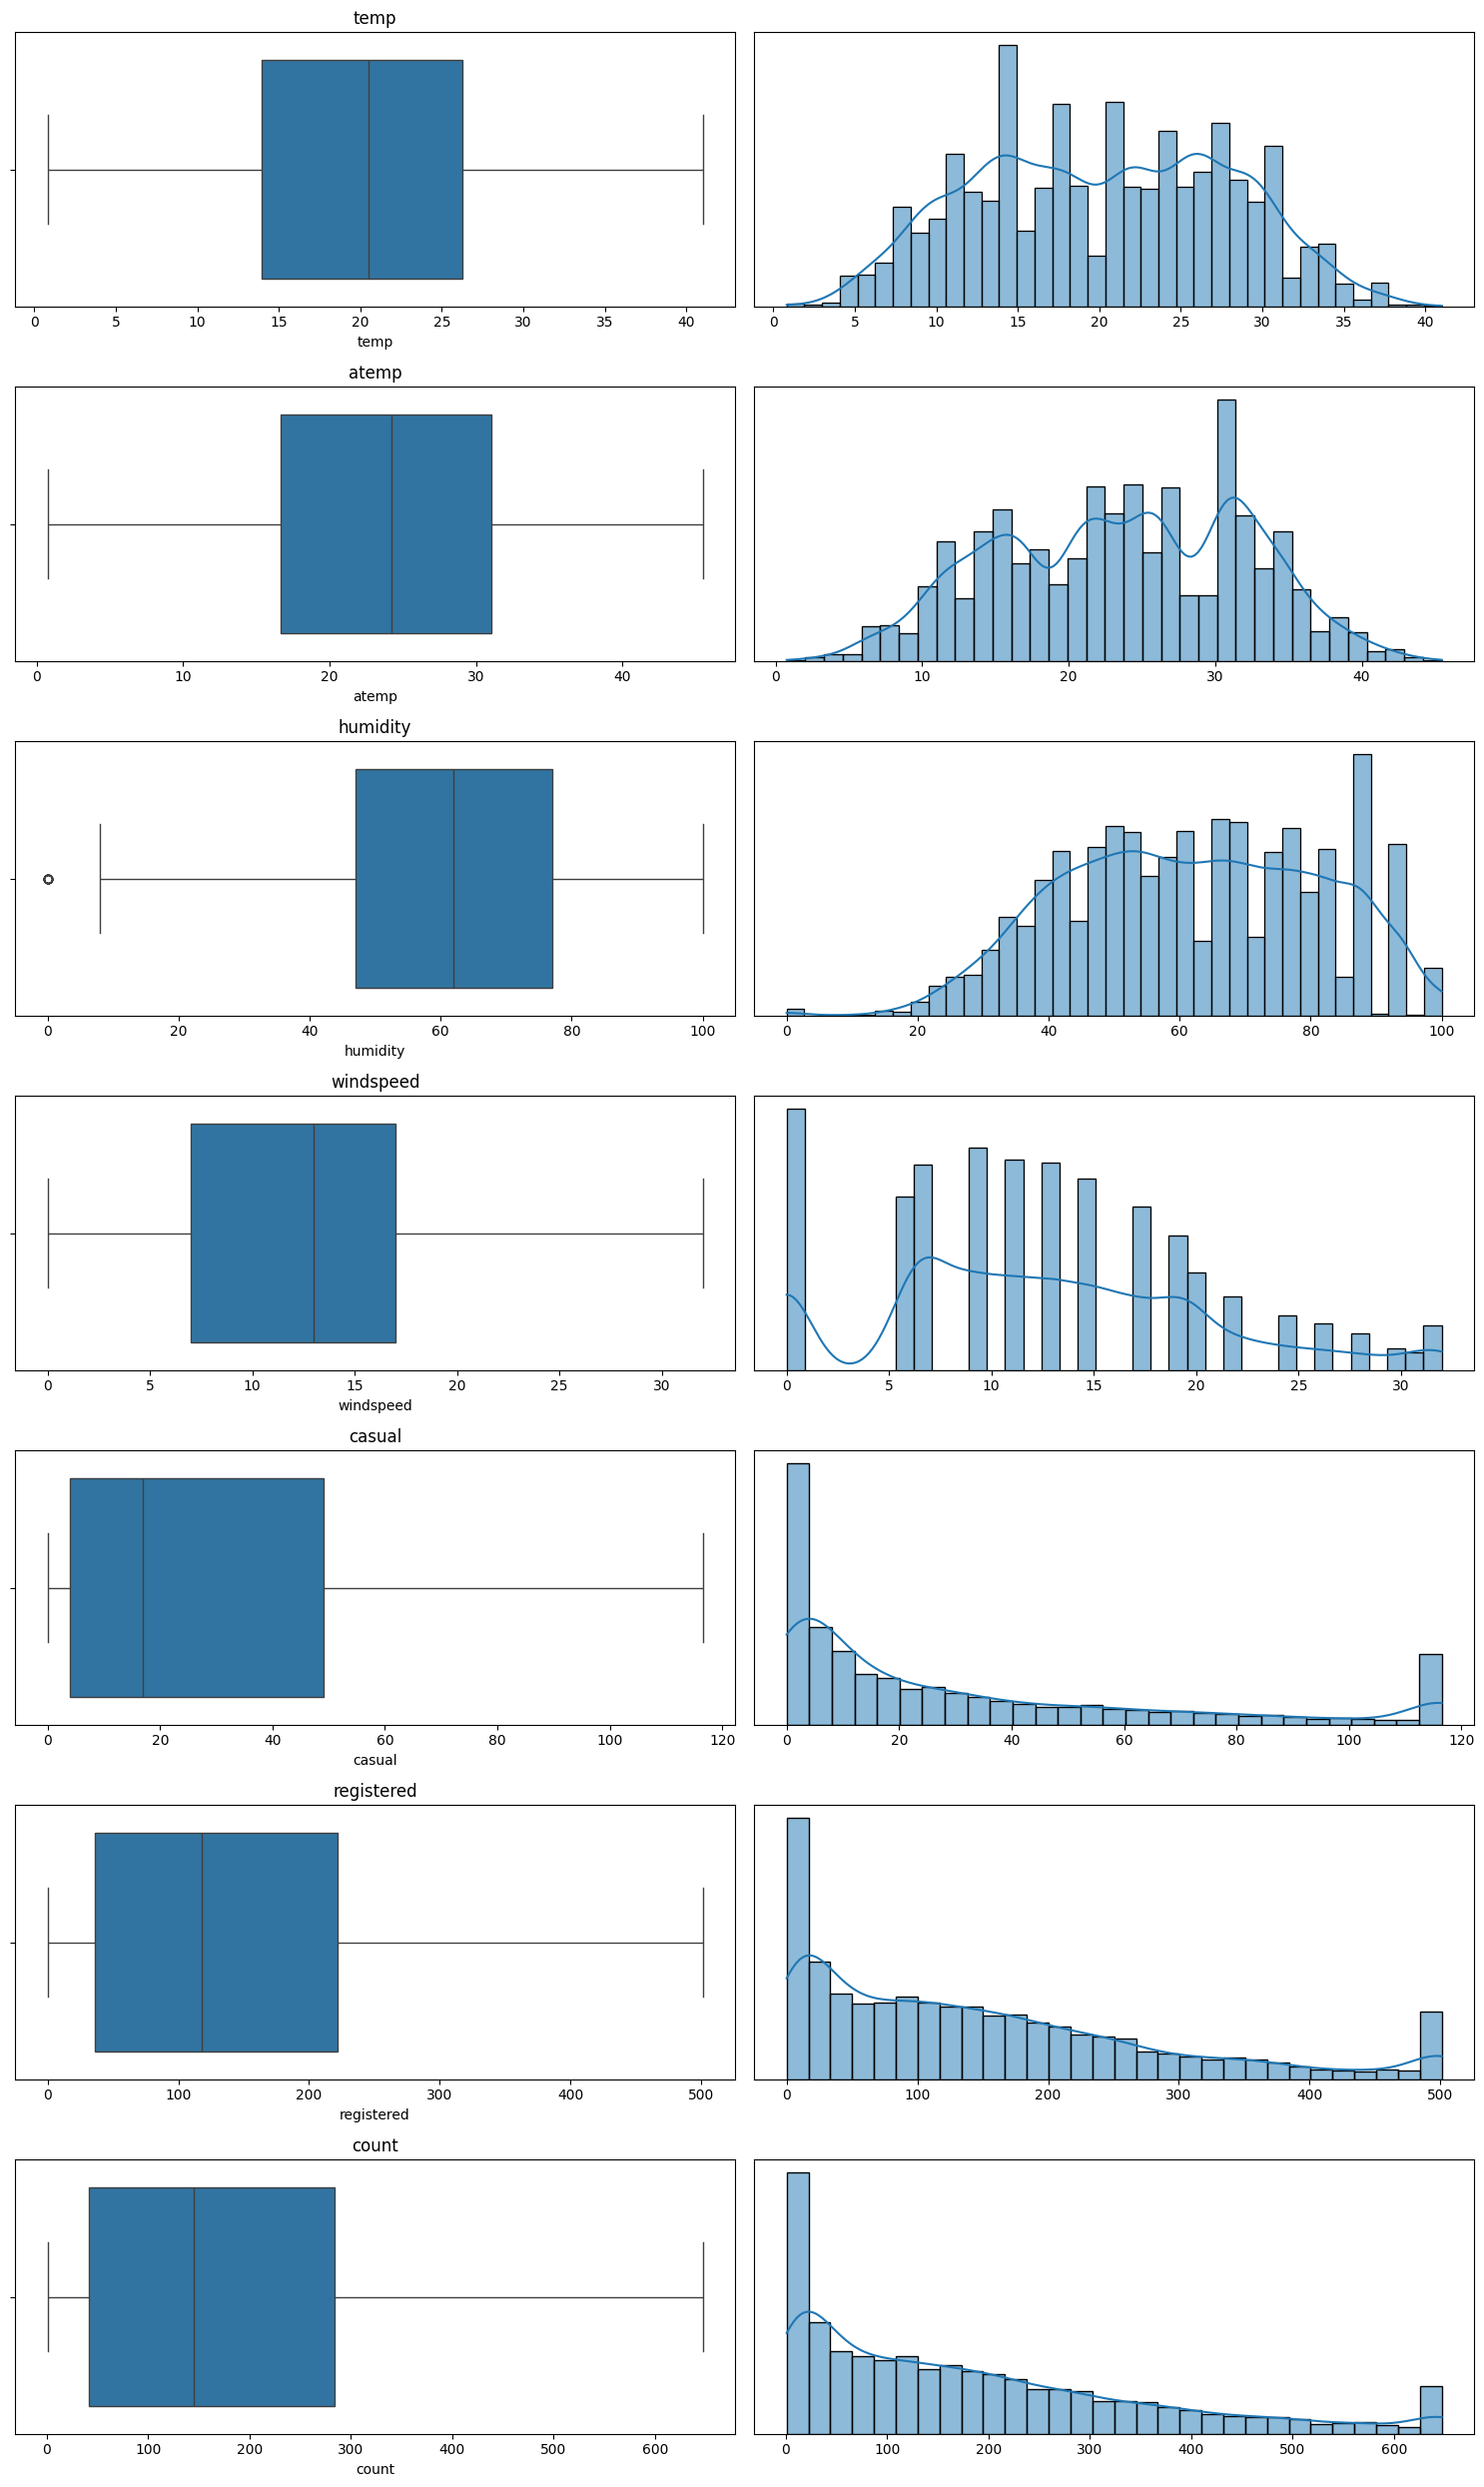

In [15]:
c=1
plt.figure(figsize=(15,25))
for i in ['temp','atemp','humidity','windspeed','casual','registered','count']:
  plt.subplot(7,2,c)
  sns.boxplot(x=yulu[i])
  plt.ylabel('')
  plt.title(i)
  c+=1
  plt.subplot(7,2,c)
  sns.histplot(yulu[i],kde=True, alpha=0.5)
  c+=1
  plt.yticks([])
  plt.ylabel('')
  plt.xlabel('')
plt.tight_layout()
plt.show()

temp, atemp, humidity follow normal distribution

There is a noticeable peak at 0 windspeed and at 5-10 windspeed. It follows positively skewed continuous distribution

**Categorical data**

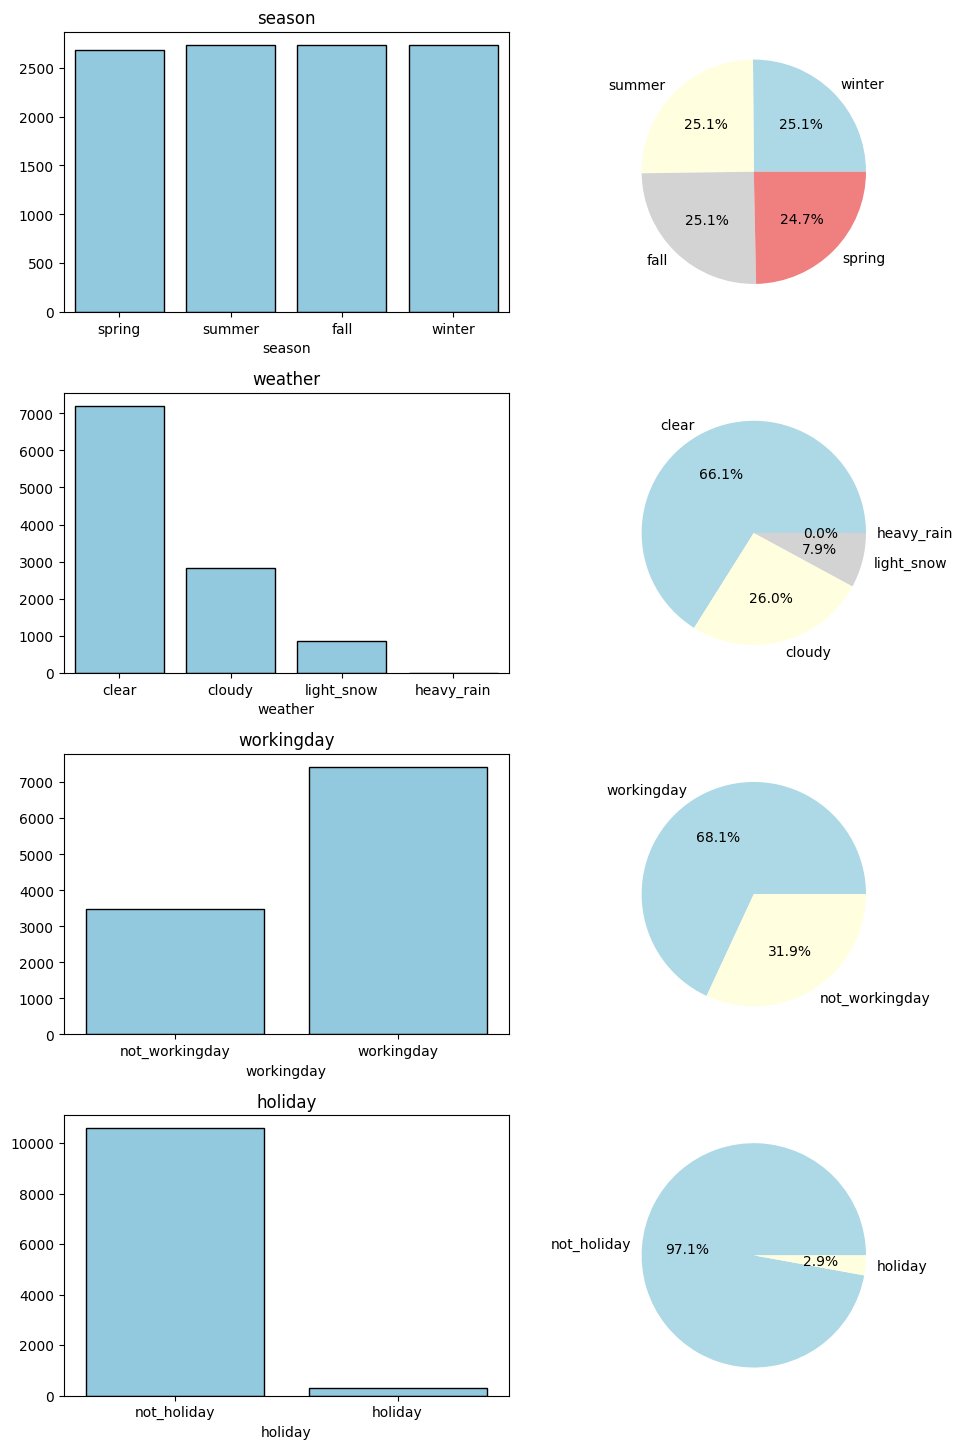

In [11]:
c=1
plt.figure(figsize=(10,25))
for i in ['season','weather','workingday','holiday']:
  plt.subplot(7,2,c)
  sns.countplot(data = yulu, x = i, color='skyblue', edgecolor='black')
  plt.title(i)
  plt.ylabel('')
  plt.title(i)
  c+=1
  plt.subplot(7,2,c)
  yulu[i].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', x = i, colors=['lightblue', 'lightyellow', 'lightgrey', 'lightcoral'])
  c+=1
  plt.yticks([])
  plt.ylabel('')
  plt.xlabel('')
plt.tight_layout()
plt.show()

Irrespective of season, people rented bikes

Weather seems to have a direct impact on the rentals as it is observed that no cycles are rented during heavy rain and highest number during clear sky

Demand for bikes was more during working days resulting in 68%

Demand of 97.1% was observed during non-holidays       



**Bivariant Analysis**

Distribution of hourly count of vehicles accross all seasons

Distribution of hourly count of vehicles during holidays

Distribution of hourly count of vehicles during working days

Distribution of hourly count of vehicles in different weather conditions

temp vs count

atemp vs count

humidity vs count

windspeed vs count

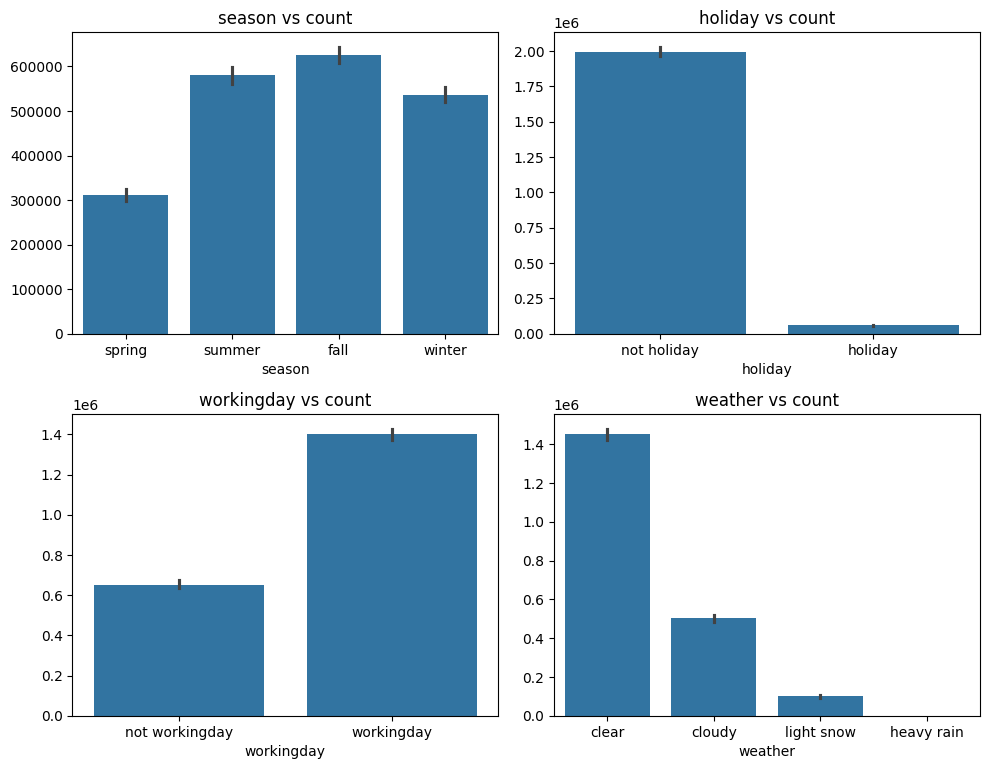

In [16]:
c=1
plt.figure(figsize=(10,15))
for i in ['season','holiday','workingday','weather']:
  plt.subplot(4,2,c)
  sns.barplot(data=yulu, x = yulu[i], y = 'count', estimator = np.sum)
  plt.ylabel('')
  plt.title(i + " vs count")
  c+=1
plt.tight_layout()
plt.show()

Insights:

Highest number of bookings were made in **summer** and **fall** seasons

Number of bookings are more during non-holidays

Number of bookings are more during working days as people use them to commute to work

Bookings see a nutural upsurge during clear sky and cloudy weather conditions and observe no bookings during heavy rain


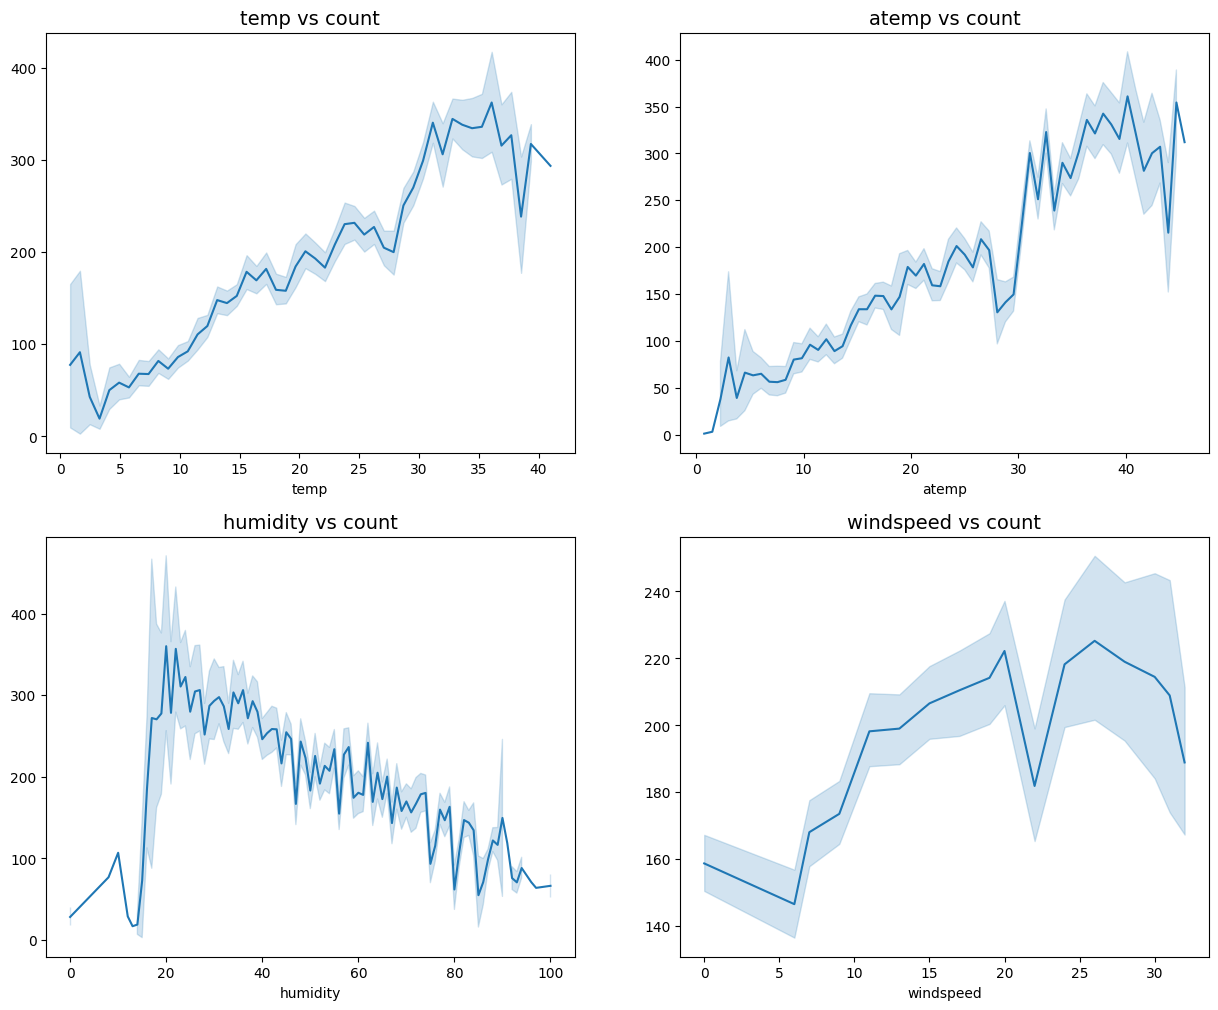

In [ ]:
c=1
plt.figure(figsize=(15,12))
for i in ['temp','atemp','humidity','windspeed']:
  plt.subplot(2,2,c)
  sns.lineplot(x=yulu[i],y=yulu['count'])
  plt.title(f'{i} vs count',fontdict={'fontsize':14})
  c+=1
  plt.ylabel("")
plt.show()

**Insights:**

**temp vs count**: Number of rentals were more when the temp is between 30 and 40 degrees

**atemp vs count** : Number of rentals were more when atemp is between 30 and 45 degrees

**humidity vs count** : Number of rentals were more when humidity is between 20 and 45 percent

**windspeed vs count** : Number of rentals were more when the windspeed is between 0 to 20 mph

In [ ]:
num_col

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

**Multivariant Analysis**

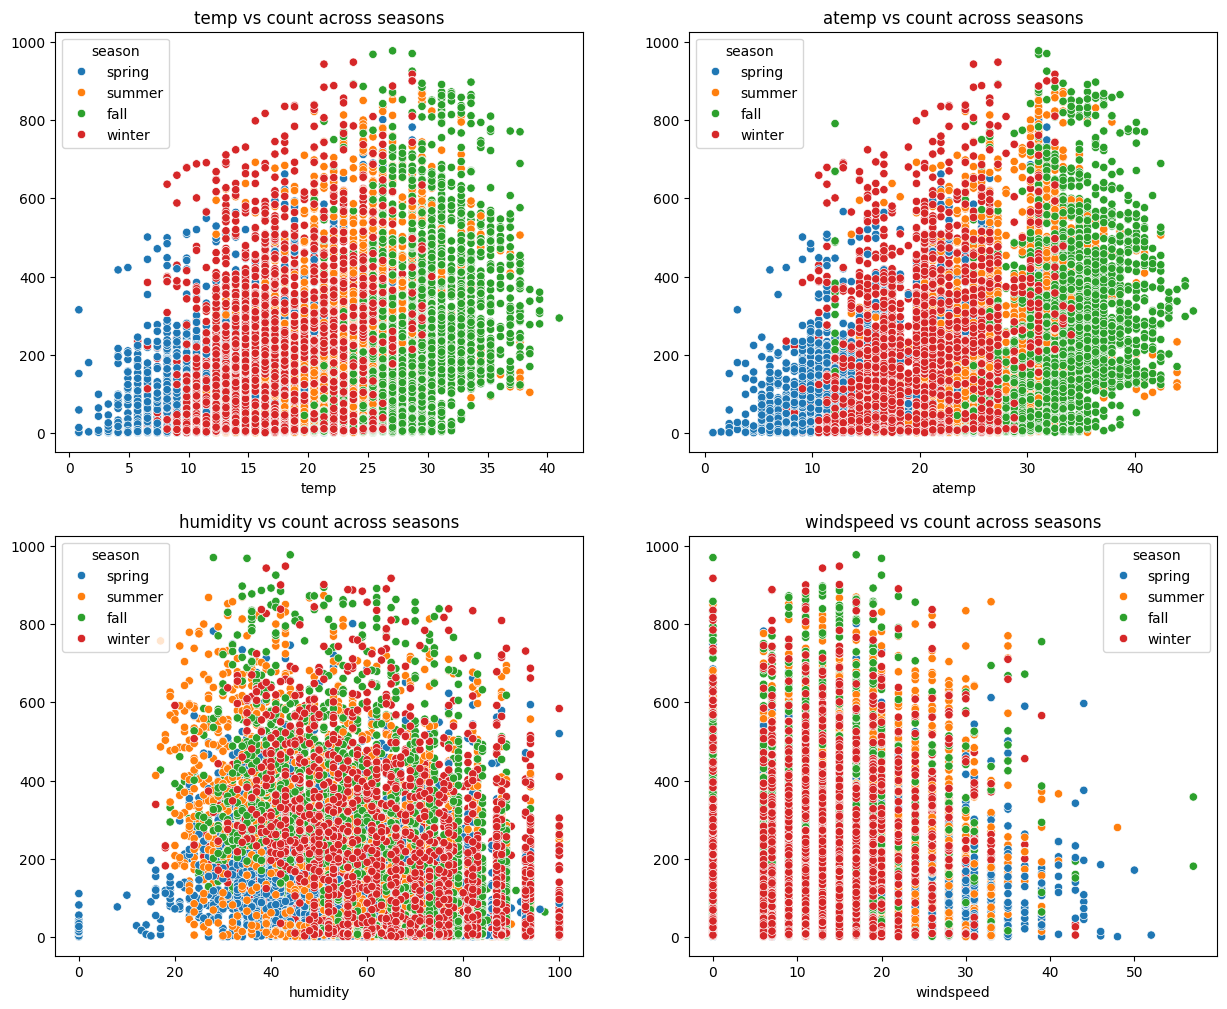

In [61]:
c = 1
plt.figure(figsize = (15,12))
for i in ['temp', 'atemp', 'humidity', 'windspeed']:
  plt.subplot(2,2,c)
  sns.scatterplot(x = yulu[i], y = yulu['count'], hue = yulu['season'])
  plt.title(f"{i} vs count across seasons")
  plt.ylabel("")
  c += 1
plt.show()

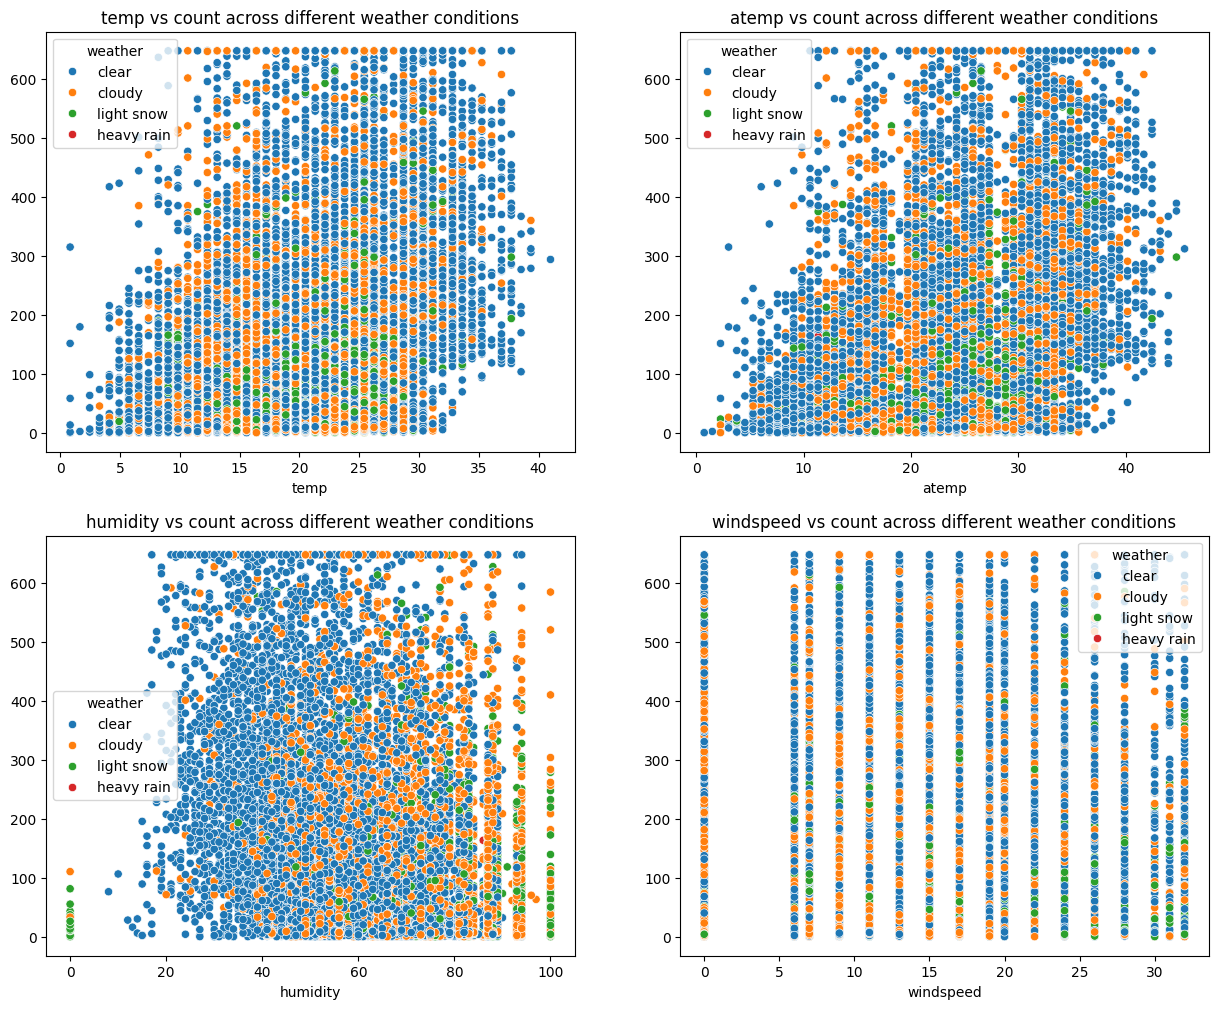

In [ ]:
c = 1
plt.figure(figsize = (15,12))
for i in ['temp', 'atemp', 'humidity', 'windspeed']:
  plt.subplot(2,2,c)
  sns.scatterplot(x = yulu[i], y = yulu['count'], hue = yulu['weather'])
  plt.title(f"{i} vs count across different weather conditions")
  plt.ylabel("")
  c += 1
plt.show()

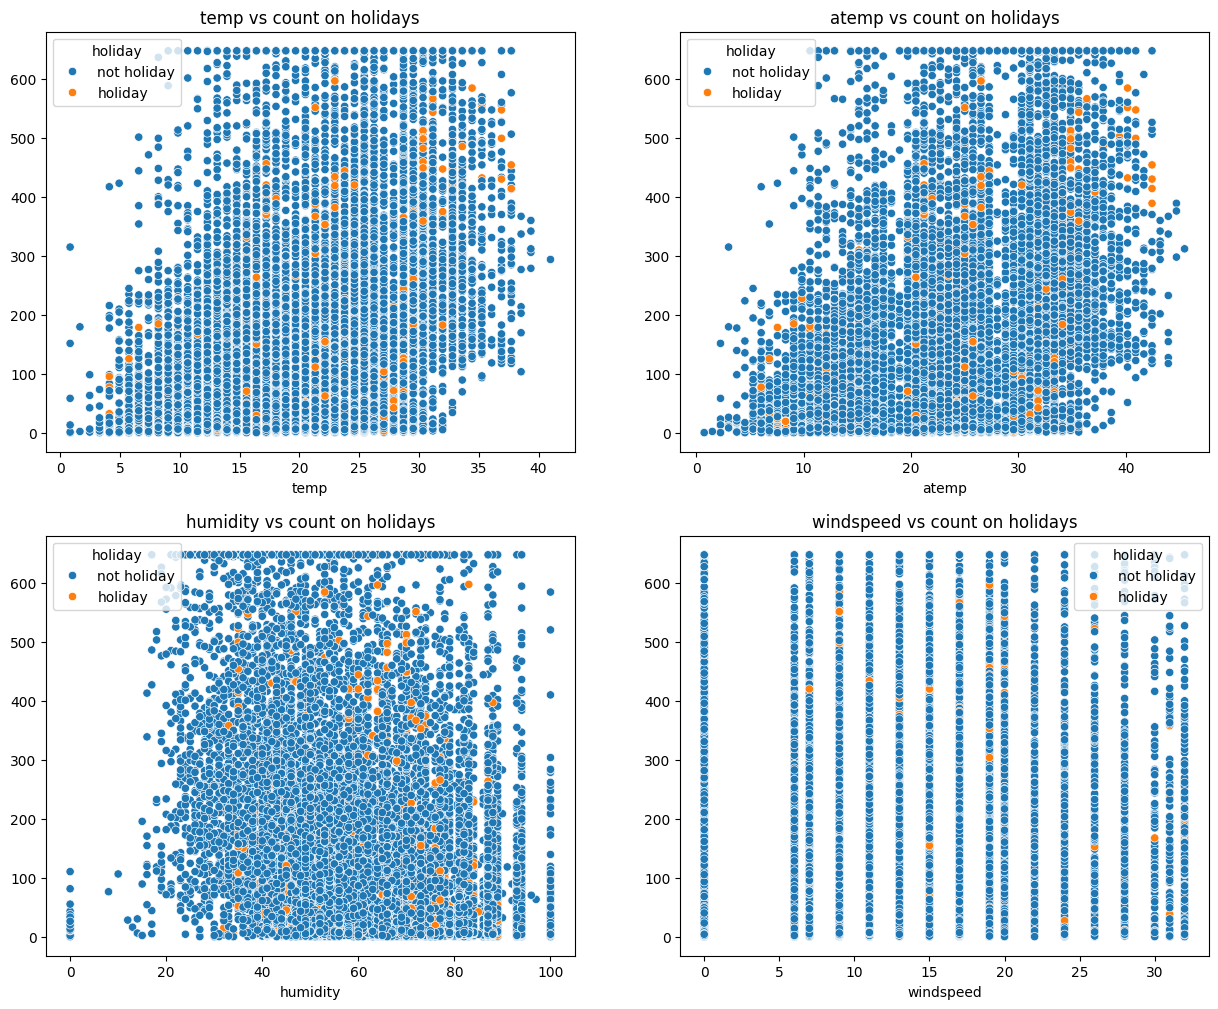

In [ ]:
c = 1
plt.figure(figsize = (15,12))
for i in ['temp', 'atemp', 'humidity', 'windspeed']:
  plt.subplot(2,2,c)
  sns.scatterplot(x = yulu[i], y = yulu['count'], hue = yulu['holiday'])
  plt.title(f"{i} vs count on holidays")
  plt.ylabel("")
  c += 1
plt.show()

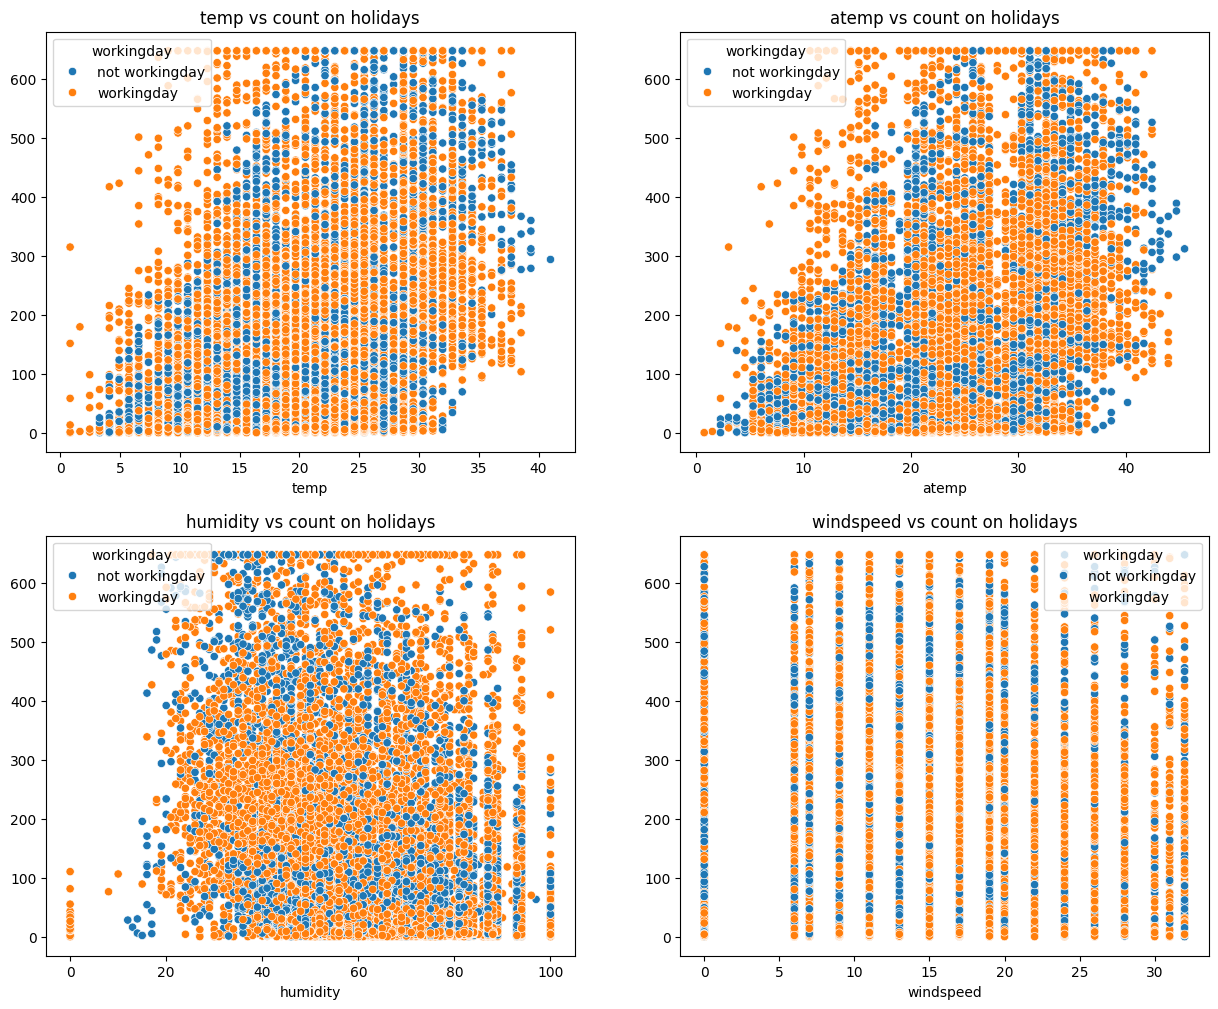

In [ ]:
c = 1
plt.figure(figsize = (15,12))
for i in ['temp', 'atemp', 'humidity', 'windspeed']:
  plt.subplot(2,2,c)
  sns.scatterplot(x = yulu[i], y = yulu['count'], hue = yulu['workingday'])
  plt.title(f"{i} vs count on holidays")
  plt.ylabel("")
  c += 1
plt.show()

**Is there any significant difference between the no. of bike rides on Weekdays
and Weekends?**

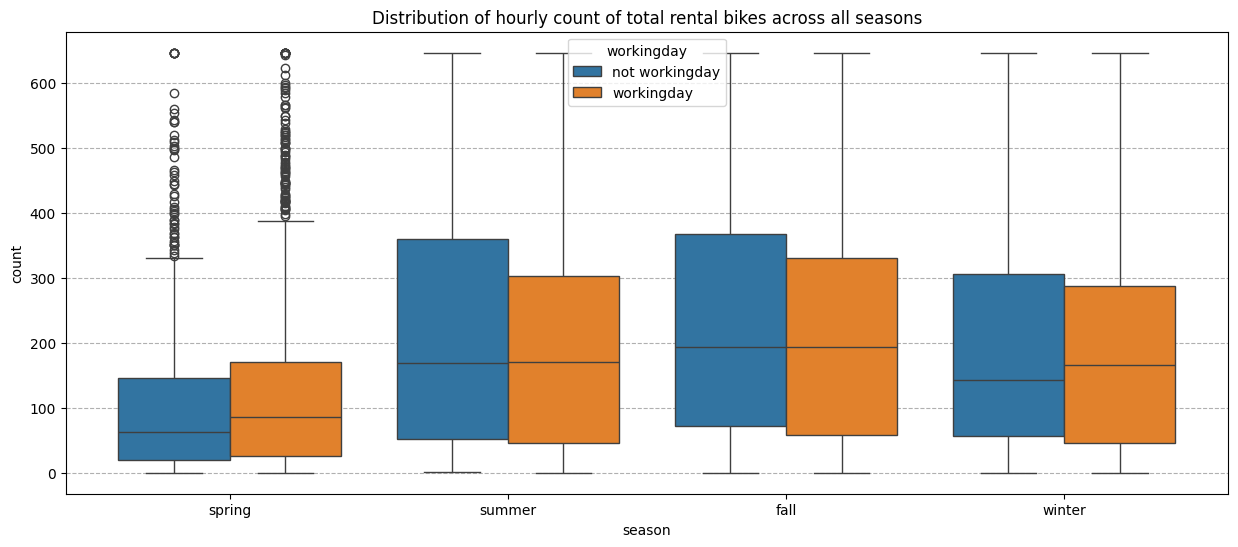

In [18]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons')
sns.boxplot(data = yulu, x = 'season', y = 'count', hue = 'workingday')
plt.grid(axis = 'y', linestyle = '--')
plt.plot()
plt.show()

The median of working day is always higher than a non working day

**3. Is there an effect of working day on number of rentals?**

**Hypothesis Testing**

Ho : Working day has no effect on the number of bike rentals

Ha : Working day has effect on the number of bike rentals

2 sample independent t test

alpha = 0.05

In [57]:
yulu.groupby(by = 'workingday')['count'].describe()

count        mean        std  min   25%    50%    75%    max
workingday                                                                   
not workingday  3474.0  187.941278  172.12254  1.0  44.0  128.0  304.0  647.0
workingday      7412.0  189.062736  172.56440  1.0  41.0  151.0  277.0  647.0

[]

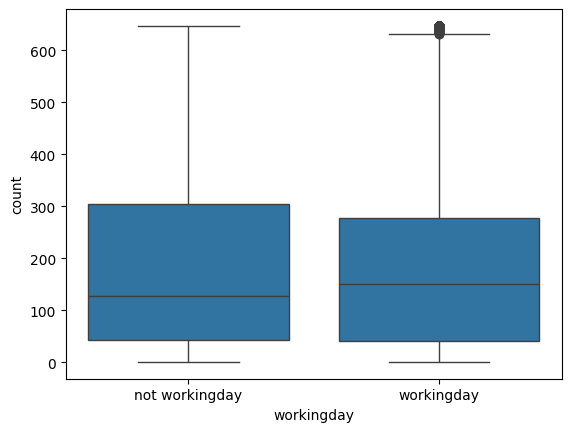

In [58]:
sns.boxplot(yulu, x = 'workingday', y = 'count')
plt.plot()

In [26]:
from scipy.stats import ttest_ind
not_workingday = yulu[yulu['workingday'] == 'not_workingday']['count']
workingday = yulu[yulu['workingday'] == 'workingday']['count']
t_stat, p_value = stats.ttest_ind(not_workingday, workingday)
alpha = 0.05
print("t_statistic : " , t_stat)
print("p_value : " , p_value)
if p_value < 0.05/2:
  print("Reject Ho")
  print("Working day has effect on number of bike rentals")
else:
  print("Fail to reject Ho")
  print("Working day has no effect on number of bike rentals")

t_statistic :  nan
p_value :  nan
Fail to reject Ho
Working day has no effect on number of bike rentals


<ipython-input-26-fcd9fdbdf407>:4: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat, p_value = stats.ttest_ind(not_workingday, workingday)


**Conclusion:**

There is no enough evidence to prove that working day has an effect on the number of rentals
Working day does not affect the count of bikes booked on yulu
Hence speacial peak time offers and high availability of bikes will contibute to increase in bookings

**4. Is the demand of bicycles on rent is same for different Weather conditions?**

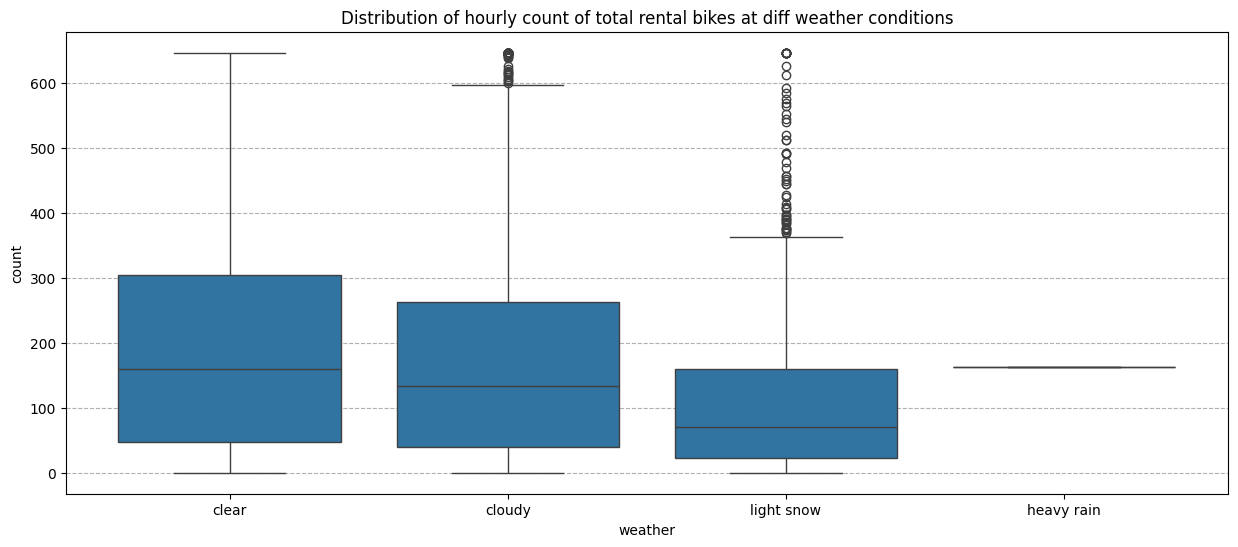

In [22]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes at diff weather conditions')
sns.boxplot(data = yulu, x = 'weather', y = 'count')
plt.grid(axis = 'y', linestyle = '--')
plt.plot()
plt.show()

In [23]:
yulu.groupby(by = 'weather')['count'].describe()

count        mean         std    min    25%    50%    75%    max
weather                                                                      
clear       7192.0  201.837736  178.167934    1.0   48.0  161.0  305.0  647.0
cloudy      2834.0  176.977417  161.940652    1.0   41.0  134.0  264.0  647.0
heavy rain     1.0  164.000000         NaN  164.0  164.0  164.0  164.0  164.0
light snow   859.0  117.469150  132.347260    1.0   23.0   71.0  161.0  647.0

More than 3 unrelated groups

Anova Test

2 way Anova test

Ho : Weather has no effect on number of rentals

Ha : Weather has effect on number of rentals

alpha = 0.05

In [35]:
from scipy.stats import shapiro
clear = yulu['count'][yulu["weather"]=='clear']
cloudy = yulu['count'][yulu["weather"]=='cloudy']
heavy_rain = yulu['count'][yulu["weather"]=='heavy_rain']
light_snow = yulu['count'][yulu["weather"]=='light_snow']

Normality check

In [34]:
stat, p_value = shapiro(clear)
print(f"Statistic : {stat}, p_value : {p_value}")
if p_value < 0.05:
  print("Reject H0")
  print("Data is not Gaussian")
else:
  print("Fail to reject H0")
  print("Data is Gaussian")

Statistic : 0.8987712937101245, p_value : 3.723807000853401e-56
Reject H0
Data is not Gaussian


In [35]:
stat, p_value = shapiro(cloudy)
print(f"Statistic : {stat}, p_value : {p_value}")
if p_value < 0.05:
  print("Reject H0")
  print("Data is not Gaussian")
else:
  print("Fail to reject H0")
  print("Data is Gaussian")

Statistic : 0.8865389098401227, p_value : 1.7719335162413008e-41
Reject H0
Data is not Gaussian


In [37]:
# Check the length of heavy_rain before performing the Shapiro-Wilk test
if len(heavy_rain) >= 3:
  stat, p_value = shapiro(heavy_rain)
  print(f"Statistic : {stat}, p_value : {p_value}")
  if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
  else:
    print("Fail to reject H0")
    print("Data is Gaussian")
else:
  print("Not enough data points in heavy_rain to perform Shapiro-Wilk test (minimum 3 required)")

Not enough data points in heavy_rain to perform Shapiro-Wilk test (minimum 3 required)


In [40]:
# Check the length of light_snow before performing the Shapiro-Wilk test
if len(light_snow) >= 3:
  stat, p_value = shapiro(light_snow)
  print(f"Statistic : {stat}, p_value : {p_value}")
  if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
  else:
    print("Fail to reject H0")
    print("Data is Gaussian")
else:
  print("Not enough data points in light_snow to perform Shapiro-Wilk test (minimum 3 required)")

Not enough data points in light_snow to perform Shapiro-Wilk test (minimum 3 required)


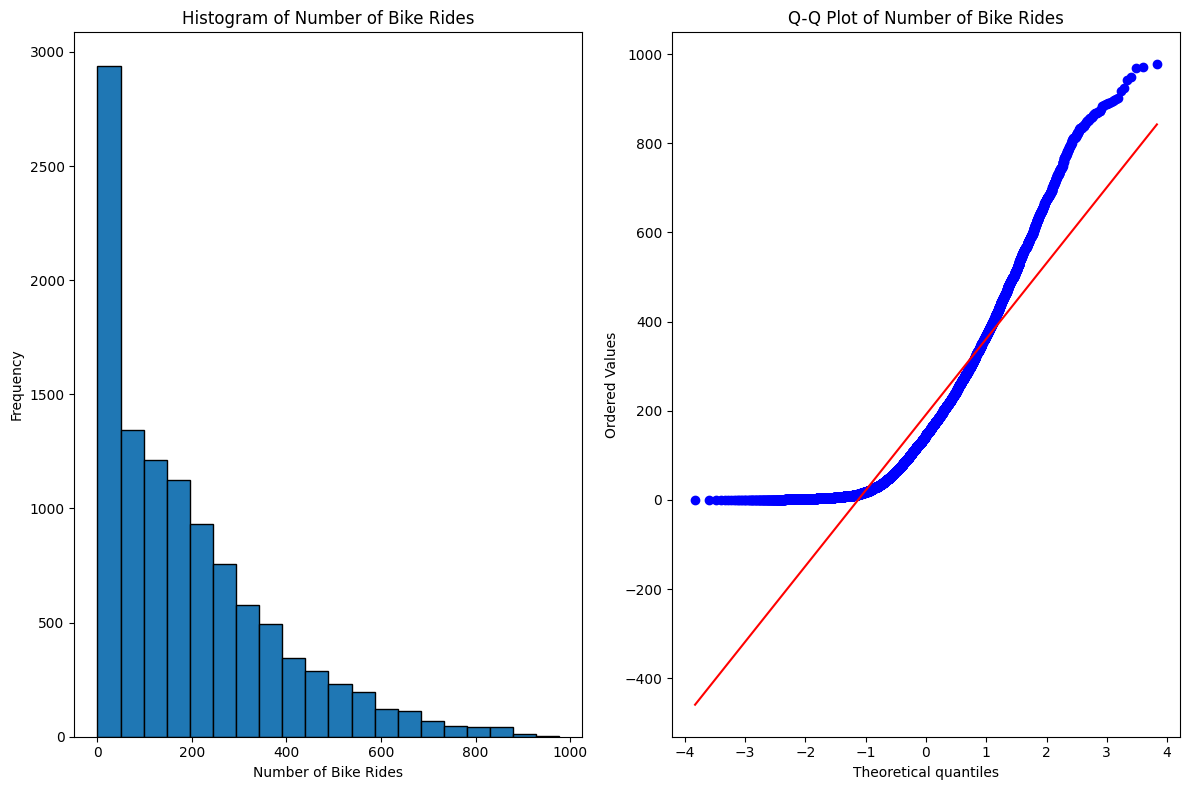

In [14]:
# Import the necessary libraries
import matplotlib.pyplot as plt
from scipy import stats

# Histogram of count variable
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
plt.hist(yulu['count'], bins=20, edgecolor='black')
plt.xlabel('Number of Bike Rides')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bike Rides')

plt.subplot(1,2,2)
# Q-Q plot of 'count' variable
# Use stats.probplot instead of stats.probplot
stats.probplot(yulu['count'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Number of Bike Rides')
plt.tight_layout()
plt.show()

Levene's test for equality of variance

In [18]:
from scipy.stats import levene
# Levene's test for equality of variance
stat, p_value = levene(clear,cloudy,heavy_rain,light_snow)
print(f"Levene's Test - Statistic: {stat}, p-value: {p_value}")
if p_value <= 0.05:
  print('Reject Null Hypothesis')
  print('Variance are not equal')
else:
  print('Fail to reject null')
  print('Variance are equal')

Levene's Test - Statistic: 54.85106195954556, p-value: 3.504937946833238e-35
Reject Null Hypothesis
Variance are not equal


The data does not follow normal distribution and does not meet the assumptions of anova such as normality and  homogenity of variances hence we need to do non parametric alternative. One such alternative is Kruskal Wallis test, a non parametric version of Anova suitable for comparing groups when the assumptions of Anova are not met

In [20]:
from scipy.stats import kruskal
# Ho : The demand of bicycle rentals is same in all weather conditions
# Ha : The demand of bicycle rentals varies significantly across different weather conditions
ktest, p_value = kruskal(clear, cloudy, heavy_rain, light_snow)
print(ktest, p_value)
if p_value < 0.05:
  print("Reject Ho")
  print("The demand of bicycle rentals varies across different weather conditions")
else:
  print("Fail to reject Ho")
  print("Weather has no effect on bicycle rentals")

205.00216514479087 3.501611300708679e-44
Reject Ho
The demand of bicycle rentals varies across different weather conditions


**Conclusion:**

There is significance evidence to prove that weather impacts the number of bicycle rentals

**Weather-Based Dynamic Pricing:**

**Recommendation:** Implement dynamic pricing based on weather conditions. For example, rentals could be priced lower during bad weather (e.g., rain, extreme cold, or heat) to encourage more users to rent bikes.

**Adjust Fleet Size According to Weather:**

**Recommendation:** Reduce or increase the number of bikes available based on weather forecasts. During bad weather, you may want to reduce the fleet size to avoid excess idle bikes, while increasing the fleet during favorable weather conditions (e.g., sunny, mild temperatures).

**Rationale:** Optimizing fleet size can reduce operational costs associated with maintaining unused bikes and maximize availability during periods of high demand.

**Weather Forecast Integration for Customers:**

**Recommendation:** Integrate real-time weather information into the rental app, along with personalized recommendations. For example, if the weather forecast predicts rain, the app can notify users to be cautious or suggest renting a bike early before the weather worsens.

**Rationale**: Providing weather-related information or alerts can improve customer experience and help users make informed decisions about renting bikes.

**Incentives During Adverse Weather:**

**Recommendation:**

Offer promotions, loyalty points, or additional benefits during bad weather conditions to incentivize users to rent bikes when they might not normally do so.

**Rationale:** By incentivizing usage in low-demand periods (e.g., with discounts or reward points), you can flatten the dips in rental activity during bad weather.

**Adapt Bike and Gear Offerings for Different Weather Conditions:**

**Recommendation:**

Offer weather-adapted gear, such as rain covers, windproof jackets, or bikes with better tires for rainy or snowy conditions. Promote this as a service upgrade in the rental app.

**Rationale:** Customers may feel more confident renting bikes during less ideal weather if they know that gear or specialized bikes are available to enhance safety and comfort.

**Optimize Maintenance Scheduling During Low-Demand Weather:**

**Recommendation:** Schedule bike maintenance during periods of low demand (e.g., when adverse weather is forecasted). This way, the company can ensure that the fleet is fully operational during peak rental periods.

**Rationale:** Taking advantage of low-demand periods for regular bike maintenance can help reduce downtime during high-demand periods.

**Offer Alternative Services During Bad Weather:**

**Recommendation:** If rentals drop significantly during specific weather conditions, explore partnerships with other transportation services (like electric scooters, car-sharing, or public transport) and offer alternatives to customers.
Rationale: By providing alternate transport modes, the company can retain customers even when cycling is less desirable due to weather, and this may help increase brand loyalty.

**Weather-Based Demand Forecasting:**

**Recommendation:** Use predictive analytics to forecast demand based on historical rental data and weather conditions. Adjust operations (like fleet distribution or staff schedules) accordingly to ensure supply meets the expected demand.

**Rationale:** Forecasting demand based on weather allows for better operational planning, reducing costs during low-demand periods and maximizing rentals during high-demand conditions.

**Target Marketing Campaigns Based on Weather:**

**Recommendation:** Launch targeted marketing campaigns based on weather conditions. For example, promote biking as a great option during pleasant weather or encourage customers with “bad weather” discounts when the forecast looks unfavorable.

**Rationale:** Customized marketing campaigns can help boost rentals during weather conditions that usually see lower demand, and it can also maximize demand during favorable conditions.

**Location-Specific Strategies Based on Local Weather Patterns:**

**Recommendation:** Tailor rental strategies for locations based on specific local weather patterns. Some regions may have predictable seasons or microclimates, and adapting rental strategies in these areas could improve profitability.

**Rationale:** A city that experiences frequent rainfall or extreme heat may require a different approach compared to a location with consistently pleasant weather. Tailoring strategies to local conditions ensures more effective management.

**Is the demand of bicycles on rent is the same for different Seasons?**

More than 3 unrelated groups

Anova test

Ho : There is no impact of season on bike rentals

Ha : There is an impact of season on bike rentals

In [13]:

from scipy.stats import shapiro
fall = yulu['count'][yulu["season"]=='fall']
spring = yulu['count'][yulu["season"]=='spring']
summer = yulu['count'][yulu["season"]=='summer']
winter = yulu['count'][yulu["season"]=='winter']

Normality check

In [36]:
stat, p_value = shapiro(fall)
print(f"Statistic : {stat}, p_value : {p_value}")
if p_value < 0.05:
  print("Reject H0")
  print("Data is not Gaussian")
else:
  print("Fail to reject H0")
  print("Data is Gaussian")

Statistic : 0.9148166372899196, p_value : 1.043680518918597e-36
Reject H0
Data is not Gaussian


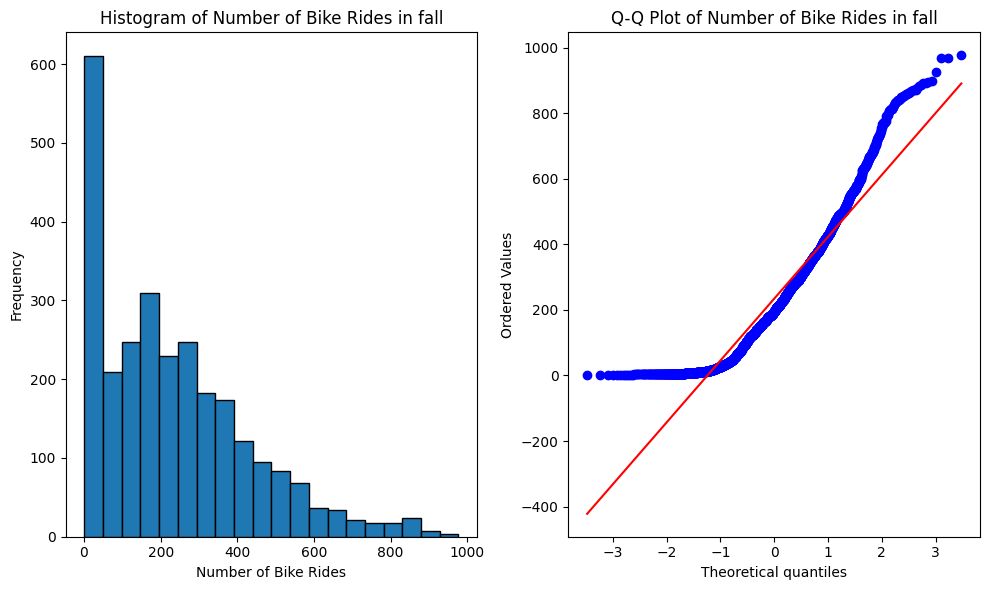

In [18]:
# Histogram of count variable
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)

plt.hist(x = fall, bins=20, edgecolor='black')
plt.xlabel('Number of Bike Rides')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bike Rides in fall')

plt.subplot(1,2,2)
# Q-Q plot of 'count' variable
from scipy import stats
stats.probplot(fall, dist="norm", plot=plt) # Access the values in the Series directly
plt.title('Q-Q Plot of Number of Bike Rides in fall')
plt.tight_layout()
plt.show()

In [19]:
stat, p_value = shapiro(spring)
print(f"Statistic : {stat}, p_value : {p_value}")
if p_value < 0.05:
  print("Reject H0")
  print("Data is not Gaussian")
else:
  print("Fail to reject H0")
  print("Data is Gaussian")

Statistic : 0.8087378401253588, p_value : 8.749584618867662e-49
Reject H0
Data is not Gaussian


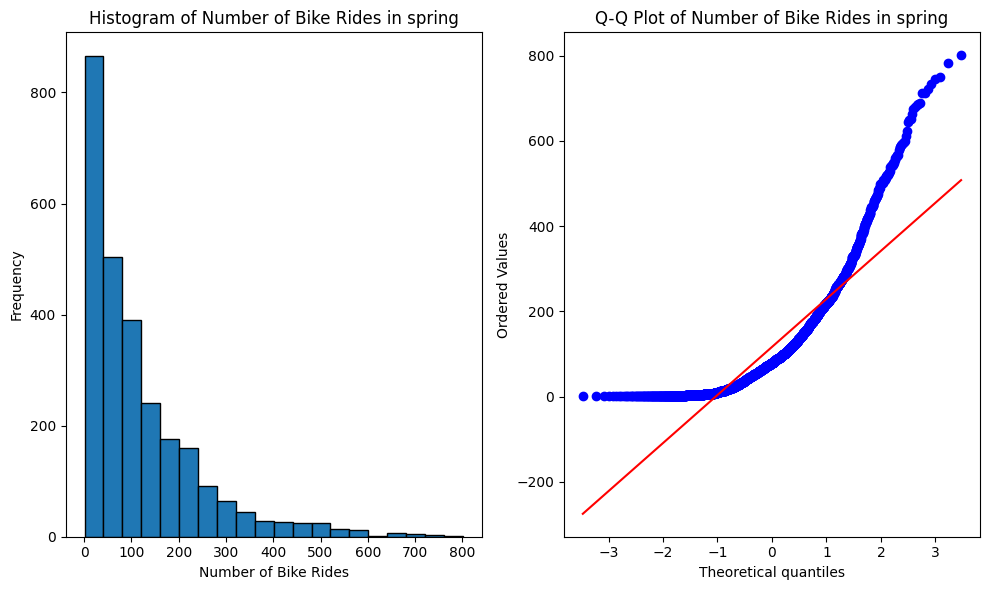

In [23]:
# Histogram of count variable
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)

plt.hist(x = spring, bins=20, edgecolor='black')
plt.xlabel('Number of Bike Rides')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bike Rides in spring')

plt.subplot(1,2,2)
# Q-Q plot of 'count' variable
from scipy import stats
stats.probplot(spring, dist="norm", plot=plt) # Access the values in the Series directly
plt.title('Q-Q Plot of Number of Bike Rides in spring')
plt.tight_layout()
plt.show()

In [20]:
stat, p_value = shapiro(summer)
print(f"Statistic : {stat}, p_value : {p_value}")
if p_value < 0.05:
  print("Reject H0")
  print("Data is not Gaussian")
else:
  print("Fail to reject H0")
  print("Data is Gaussian")

Statistic : 0.9004818080893252, p_value : 6.039374406270491e-39
Reject H0
Data is not Gaussian


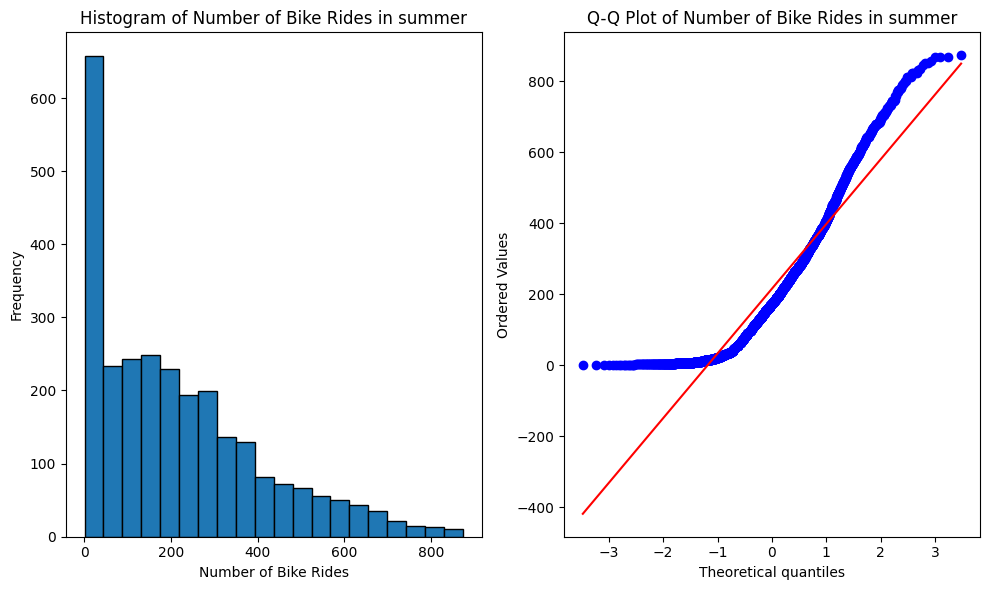

In [24]:
# Histogram of count variable
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)

plt.hist(x = summer, bins=20, edgecolor='black')
plt.xlabel('Number of Bike Rides')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bike Rides in summer')

plt.subplot(1,2,2)
# Q-Q plot of 'count' variable
from scipy import stats
stats.probplot(summer, dist="norm", plot=plt) # Access the values in the Series directly
plt.title('Q-Q Plot of Number of Bike Rides in summer')
plt.tight_layout()
plt.show()

In [21]:
stat, p_value = shapiro(winter)
print(f"Statistic : {stat}, p_value : {p_value}")
if p_value < 0.05:
  print("Reject H0")
  print("Data is not Gaussian")
else:
  print("Fail to reject H0")
  print("Data is Gaussian")

Statistic : 0.8954637482095505, p_value : 1.1299244409282836e-39
Reject H0
Data is not Gaussian


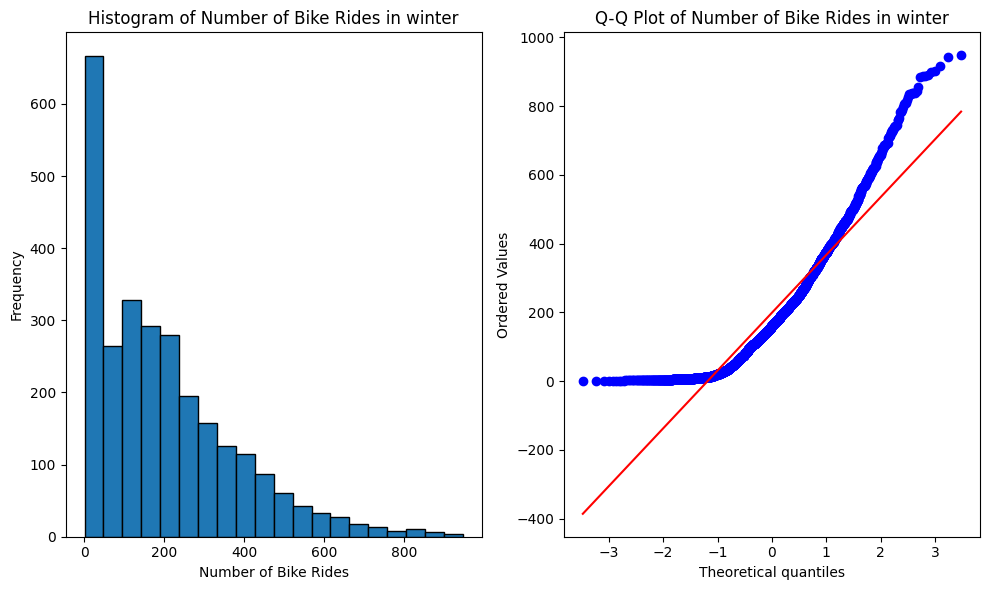

In [25]:
# Histogram of count variable
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)

plt.hist(x = winter, bins=20, edgecolor='black')
plt.xlabel('Number of Bike Rides')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bike Rides in winter')

plt.subplot(1,2,2)
# Q-Q plot of 'count' variable
from scipy import stats
stats.probplot(winter, dist="norm", plot=plt) # Access the values in the Series directly
plt.title('Q-Q Plot of Number of Bike Rides in winter')
plt.tight_layout()
plt.show()

2 way Anova test cannot be used as data does not follow Normal Distribution

In [26]:
stat, p_value = shapiro(yulu['count'])
print(f"Statistic: {stat}, p-value: {p_value}")

Statistic: 0.8783658962690556, p-value: 5.369837893115507e-68


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


Levene's Test

In [29]:
from scipy.stats import levene
stat, p_value = levene(fall, spring, summer, winter)
print(f"Levene's Test - Statistic: {stat}, p-value: {p_value}")
if p_value <= 0.05:
  print('Reject Null Hypothesis')
  print('Variance are not equal')
else:
  print('Fail to reject null')
  print('Variance are equal')

Levene's Test - Statistic: 187.7706624026276, p-value: 1.0147116860043298e-118
Reject Null Hypothesis
Variance are not equal


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can
perform its non parametric equivalent test i.e., Kruskal-Wallis test for independent samples.

Kruskal Test

In [62]:
from scipy.stats import kruskal
k_stat, p_value = kruskal(fall, spring, summer, winter)
print(k_stat, p_value)
if p_value <= 0.05:
  print('Reject Null Hypothesis')
  print('There is an effect on number of rentals')
else:
  print('Fail to reject null')
  print('There is no effect on number of rentals')

699.6668548181988 2.479008372608633e-151
Reject Null Hypothesis
There is an effect on number of rentals


Conclusion:
The demand for bicycles is same in all seasons

**Recommendations:**

You can launch special **summer** promotions, increase bike inventory, and provide better customer service during this season.

Focus on Registered Users: Since registered users contribute a lot to your revenue, consider offering special incentives or loyalty programs for them to keep them active.

You can create special offers, like getting a free snowboard with every bike rental or getting two days for the price of one in **winters**.

**Are Weather conditions significantly different during different Seasons?**

Since we are comparing two categorical variables, weather and season, the appropriate statistical test to determine if there is a significant association between them is the Chi-Square test

H0: Weather conditions are same in all seasons
Ha : Weather conditions are different in all seasons



In [36]:
from scipy.stats import chi2_contingency
data=pd.crosstab(index=yulu["weather"],columns=yulu["season"])
chi_stat, p_value, dof, exp_freq = chi2_contingency(data) # chi_stat, p_value,df, expected value
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",dof)
print("exp_freq:",exp_freq)
if p_value<0.05:
  print("reject Ho, Weather is dependent on Season")
else:
  print("failed to reject Ho, Weather is not dependent on Season")

chi_stat: 49.15865559689363
p_value: 1.5499250736864862e-07
df: 9
exp_freq: [[1.80559765e+03 1.77454639e+03 1.80559765e+03 1.80625831e+03]
 [7.11493845e+02 6.99258130e+02 7.11493845e+02 7.11754180e+02]
 [2.51056403e-01 2.46738931e-01 2.51056403e-01 2.51148264e-01]
 [2.15657450e+02 2.11948742e+02 2.15657450e+02 2.15736359e+02]]
reject Ho, Weather is dependent on Season


There is enough significance to prove the claim that weather is dependent on season